In [1]:
using AlgebraicPetri

using OrdinaryDiffEq
using StochasticDiffEq
using DiffEqJump
using Plots
using LabelledArrays
using Catlab
using Catlab.Graphics
using Catlab.WiringDiagrams
using Catlab.CategoricalAlgebra
using Catlab.Programs.RelationalPrograms

display_uwd(ex) = to_graphviz(ex, box_labels=:name, junction_labels=:variable, edge_attrs=Dict(:len=>".75"));

In [10]:
leftNet = LabelledPetriNet([:S, :I], :β=>(:S,:I)=>(:I,:I))

LabelledPetriNet with elements T = 1:1, S = 1:2, I = 1:2, O = 1:2
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │     β │
└───┴───────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     I │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  2 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  1 │  2 │
└───┴────┴────┘

In [11]:
rightNet = LabelledPetriNet([:I, :S], :γ=>(:I=>:S))

LabelledPetriNet with elements T = 1:1, S = 1:2, I = 1:1, O = 1:1
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │     γ │
└───┴───────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     I │
│ 2 │     S │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  2 │
└───┴────┴────┘

In [14]:
openLeftNet = Open([], leftNet, [:S, :I])

StructuredCospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{Catlab.CSetDataStructures.StructACSetFrame{(:S,), Catlab.Theories.SchemaDescType{(:S,), (), (:Name,), (:sname,), (sname = 1,), (sname = 1,)}, Tuple{Symbol}, (sname = false,), (sname = false,), NamedTuple{(:sname,), Tuple{Vector{Symbol}}}}, LabelledPetriNet}, Multicospan{LabelledPetriNet, TightACSetTransformation{Catlab.Theories.SchemaDescType{(:T, :S, :I, :O), (:it, :is, :ot, :os), (:Name,), (:tname, :sname), (it = 3, is = 3, ot = 4, os = 4, tname = 1, sname = 2), (it = 1, is = 2, ot = 1, os = 2, tname = 1, sname = 1)}, NamedTuple{(:T, :S, :I, :O), Tuple{Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, UnitRange{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, UnitRange{Int64}, Catlab.CategoricalAlgebra.FinSets.F

In [16]:
openRightNet = Open([:S, :I], rightNet, [:S, :I])

StructuredCospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{Catlab.CSetDataStructures.StructACSetFrame{(:S,), Catlab.Theories.SchemaDescType{(:S,), (), (:Name,), (:sname,), (sname = 1,), (sname = 1,)}, Tuple{Symbol}, (sname = false,), (sname = false,), NamedTuple{(:sname,), Tuple{Vector{Symbol}}}}, LabelledPetriNet}, Multicospan{LabelledPetriNet, TightACSetTransformation{Catlab.Theories.SchemaDescType{(:T, :S, :I, :O), (:it, :is, :ot, :os), (:Name,), (:tname, :sname), (it = 3, is = 3, ot = 4, os = 4, tname = 1, sname = 2), (it = 1, is = 2, ot = 1, os = 2, tname = 1, sname = 1)}, NamedTuple{(:T, :S, :I, :O), Tuple{Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, UnitRange{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, UnitRange{Int64}, Catlab.CategoricalAlgebra.FinSets.F

In [17]:
openFullNet = compose(openLeftNet, openRightNet)

StructuredCospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{Catlab.CSetDataStructures.StructACSetFrame{(:S,), Catlab.Theories.SchemaDescType{(:S,), (), (:Name,), (:sname,), (sname = 1,), (sname = 1,)}, Tuple{Symbol}, (sname = false,), (sname = false,), NamedTuple{(:sname,), Tuple{Vector{Symbol}}}}, LabelledPetriNet}, Multicospan{LabelledPetriNet, TightACSetTransformation{Catlab.Theories.SchemaDescType{(:T, :S, :I, :O), (:it, :is, :ot, :os), (:Name,), (:tname, :sname), (it = 3, is = 3, ot = 4, os = 4, tname = 1, sname = 2), (it = 1, is = 2, ot = 1, os = 2, tname = 1, sname = 1)}, NamedTuple{(:T, :S, :I, :O), NTuple{4, Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}}}, LabelledPetriNet, LabelledPetriNet}, StaticArraysCore.SVector{2, TightACSetTransformation{Catlab.Theories.SchemaDescType{(:T, :S, :I, :O), (:it, :is, :ot, :os), (:Name,), (:tname, :sname), (it = 3, is = 3, ot = 4, os = 4, tname = 1, sn

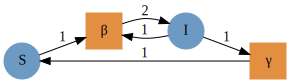

In [18]:
Graph(openFullNet)

In [20]:
openFullNet


StructuredCospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{Catlab.CSetDataStructures.StructACSetFrame{(:S,), Catlab.Theories.SchemaDescType{(:S,), (), (:Name,), (:sname,), (sname = 1,), (sname = 1,)}, Tuple{Symbol}, (sname = false,), (sname = false,), NamedTuple{(:sname,), Tuple{Vector{Symbol}}}}, LabelledPetriNet}, Multicospan{LabelledPetriNet, TightACSetTransformation{Catlab.Theories.SchemaDescType{(:T, :S, :I, :O), (:it, :is, :ot, :os), (:Name,), (:tname, :sname), (it = 3, is = 3, ot = 4, os = 4, tname = 1, sname = 2), (it = 1, is = 2, ot = 1, os = 2, tname = 1, sname = 1)}, NamedTuple{(:T, :S, :I, :O), NTuple{4, Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}}}, LabelledPetriNet, LabelledPetriNet}, StaticArraysCore.SVector{2, TightACSetTransformation{Catlab.Theories.SchemaDescType{(:T, :S, :I, :O), (:it, :is, :ot, :os), (:Name,), (:tname, :sname), (it = 3, is = 3, ot = 4, os = 4, tname = 1, sn

In [22]:
legs(openFullNet)

2-element StaticArraysCore.SVector{2, TightACSetTransformation{Catlab.Theories.SchemaDescType{(:T, :S, :I, :O), (:it, :is, :ot, :os), (:Name,), (:tname, :sname), (it = 3, is = 3, ot = 4, os = 4, tname = 1, sname = 2), (it = 1, is = 2, ot = 1, os = 2, tname = 1, sname = 1)}, NamedTuple{(:T, :S, :I, :O), NTuple{4, Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}}}, LabelledPetriNet, LabelledPetriNet}} with indices SOneTo(2):
 ACSetTransformation((T = FinFunction(Int64[], 0, 2), S = FinFunction(Int64[], 0, 2), I = FinFunction(Int64[], 0, 3), O = FinFunction(Int64[], 0, 3)), LabelledPetriNetUntyped {T = 0, S = 0, I = 0, O = 0}, LabelledPetriNetUntyped {T = 2, S = 2, I = 3, O = 3})
 ACSetTransformation((T = FinFunction(Int64[], 0, 2), S = FinFunction([1, 2], 2, 2), I = FinFunction(Int64[], 0, 3), O = FinFunction(Int64[], 0, 3)), LabelledPetriNetUntyped {T = 0, S = 2, I = 0, O = 0}, LabelledPetriNetUntyped {T = 2, S = 2